In [3]:
import numpy as np 
import math as m
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rc('font', size=20)

/home/yoko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/yoko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


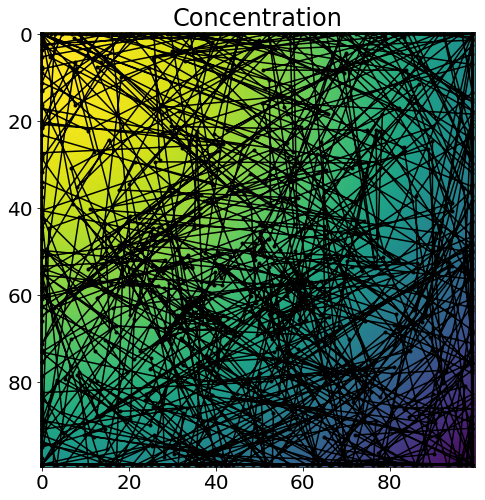

In [4]:
x, y = np.mgrid[-np.pi : np.pi / 2 : 100j,
                -np.pi : np.pi / 2 : 100j]

z = np.sin(x + 1.5) + np.cos(y) 

fig, ax = plt.subplots()
fig.set_figwidth(8)    
fig.set_figheight(8)  
#z[99][99] = -1

MIN_Z = 0
MAX_Z = 99
V = 1
t = 1
x0, y0 = 50, 50
plt.plot(x0, y0, marker='.', c='black')
delX, delY = 1 * V, 1 * V
x1, y1 = x0 + delX, y0 + delY
plt.plot(x1, y1, marker='.', c='black')

def advanceNextStep(t):
    directions = [-1, 0, 1]
    coef1, coef2 = rnd.choice(directions), rnd.choice(directions)
    teta = rnd.random() * 2 * np.pi
    return np.cos(teta) * t * V, np.sin(teta) * t * V

def goTroughBorder(x, y):
    if(x < MIN_Z): x = MIN_Z
    if(x > MAX_Z): x = MAX_Z 
    if(y < MIN_Z): y = MIN_Z 
    if(y > MAX_Z): y = MAX_Z 
    return x, y
    

def move(xPrev, yPrev, t, xCur, yCur):
    rhoPrev = z[xPrev][yPrev]
    rhoCur  = z[xCur][yCur]
    #print(rhoPrev, rhoCur)
    if(rhoCur <= rhoPrev):
        t = t + 1
    else: t = t - 1

    #print(t)
    delX, delY = advanceNextStep(t)
    #print(delX, delY)
    xPrev, yPrev = xCur, yCur
    xCur, yCur = xPrev + delX, yPrev + delY
    #print(xCur, yCur)
    xCur, yCur = goTroughBorder(xCur, yCur)
    #print(xCur, yCur)
    return xCur, yCur, t

def drawTrajectory(x0, y0, t, x1, y1):
    nextX, nextY, t = move(x0, y0, t, x1, y1)
    #plt.plot(nextX, nextY, marker='.', c='black')
    return nextX, nextY, t

xs, ys = [x0, x1], [y0, y1]
ax.imshow(z, interpolation='none')#, cmap='plasma')
ax.set_title('Concentration')

for i in range(1000):
    nextX, nextY, t = drawTrajectory(x0, y0, t, x1, y1)
    xs.append(nextX)
    ys.append(nextY)
    x0, y0 = x1, y1
    x1, y1 = nextX, nextY

plt.plot(xs, ys, marker='.', c='black')
plt.show()